In [154]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_csv('../course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [156]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [157]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [158]:
numerical = ["number_of_courses_viewed", "annual_income", "interaction_count", "lead_score", "converted"]
categorical = ["lead_source", "industry", "employment_status", "location"]

In [159]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna("NA")

In [160]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [161]:
df["industry"].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [162]:
correlation_matrix = df[numerical].corr()

print(correlation_matrix)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


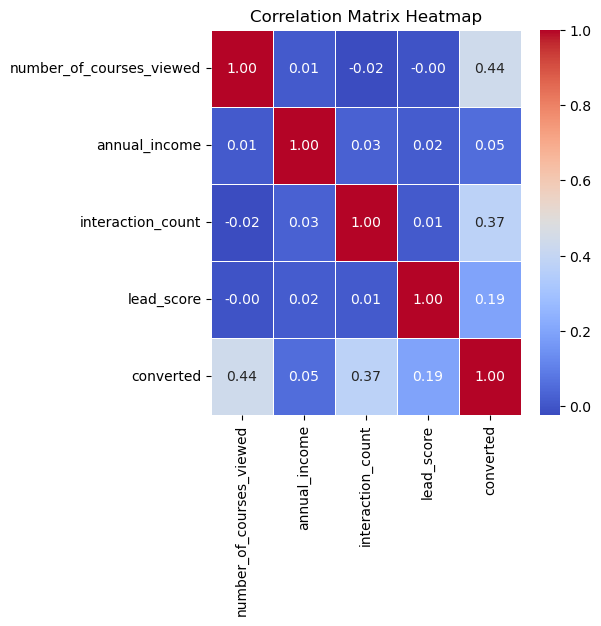

In [163]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [164]:
#interaction_count and lead_score 0.01
#number_of_courses_viewed and lead_score 0
#number_of_courses_viewed and interaction_count -0.02
#annual_income and interaction_count 0.03

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [167]:
df_train_full

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1066,social_media,manufacturing,2,44403.0,self_employed,australia,1,0.71,0
638,events,retail,3,38048.0,student,north_america,6,0.97,1
799,social_media,education,2,71399.0,NA,europe,1,0.51,1
380,referral,education,2,47912.0,employed,australia,1,0.04,0
303,paid_ads,healthcare,1,34806.0,employed,europe,4,0.32,1
...,...,...,...,...,...,...,...,...,...
1130,events,manufacturing,1,57039.0,employed,south_america,2,0.30,0
1294,events,healthcare,2,56185.0,student,south_america,2,0.44,0
860,paid_ads,manufacturing,1,56402.0,student,north_america,1,0.02,0
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1


In [168]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [169]:
df_val

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
662,paid_ads,healthcare,3,52220.0,unemployed,europe,1,0.07,0
600,organic_search,technology,3,59656.0,unemployed,middle_east,4,0.65,1
477,events,manufacturing,0,57134.0,self_employed,north_america,4,0.13,0
1057,events,other,0,0.0,NA,asia,0,0.03,0
891,referral,retail,1,54103.0,unemployed,south_america,3,0.16,0
...,...,...,...,...,...,...,...,...,...
1367,social_media,healthcare,1,55222.0,self_employed,africa,1,0.25,0
1390,paid_ads,NA,1,20326.0,employed,middle_east,3,0.81,1
419,organic_search,technology,1,74166.0,employed,south_america,2,0.01,0
114,organic_search,technology,2,39103.0,self_employed,africa,3,0.60,1


In [171]:
y_train = df_train.converted.values
y_val = df_val.converted.values

In [172]:
del df_train['converted']
del df_val['converted']

In [173]:
from sklearn.metrics import mutual_info_score

In [174]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(round(df_mi, 2))

,MI
lead_source,0.04
employment_status,0.01
industry,0.01
location,0.00


In [175]:
from sklearn.feature_extraction import DictVectorizer

In [180]:
numerical.remove("converted")

In [182]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [185]:
train_dict[42]

{'lead_source': 'organic_search',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'north_america',
 'number_of_courses_viewed': 3,
 'annual_income': 75955.0,
 'interaction_count': 1,
 'lead_score': 0.12}

In [186]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [187]:
X_train = dv.transform(train_dict)

In [188]:
X_train

array([[5.8472e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1738e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [8.1973e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [8.9042e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0259e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00]])

In [189]:
from sklearn.linear_model import LogisticRegression

In [191]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [192]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [230]:
y_pred = model.predict_proba(X_val)[:, 1]

In [225]:
y_pred

array([0.61192163, 0.79982617, 0.53021344, 0.47131479, 0.57066132,
       0.44227169, 0.87127669, 0.84883115, 0.83290038, 0.61497802,
       0.54968027, 0.78153088, 0.69039786, 0.77017122, 0.52659441,
       0.91706425, 0.53170635, 0.42123049, 0.30146455, 0.84881583,
       0.79488653, 0.73670375, 0.44527211, 0.64838383, 0.4176882 ,
       0.75393418, 0.90166116, 0.33903049, 0.43181431, 0.9680681 ,
       0.92018714, 0.37487989, 0.652301  , 0.90650057, 0.75164117,
       0.64202122, 0.82250075, 0.83375553, 0.659116  , 0.30978854,
       0.78942264, 0.35546366, 0.96517758, 0.63389304, 0.51274195,
       0.53230534, 0.82287785, 0.744074  , 0.73452314, 0.68955217,
       0.46964443, 0.84539253, 0.55635244, 0.92637871, 0.65258021,
       0.61526273, 0.63816996, 0.28304018, 0.48049825, 0.57890618,
       0.35497342, 0.62175052, 0.38960778, 0.61156056, 0.85304278,
       0.75430136, 0.89185954, 0.71946459, 0.95387623, 0.89209517,
       0.75277088, 0.33850139, 0.61376593, 0.51622275, 0.64088

In [226]:
y_pred_converted = y_pred >= 0.5
y_pred_converted.astype(int)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0])

In [227]:
df_pred = pd.DataFrame()
df_pred['predicition'] = y_pred_converted.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = (df_pred['predicition'] == df_pred['actual']).astype(int)
df_pred

,predicition,actual,correct
0,1,0,0
1,1,1,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
288,0,0,1
289,1,1,1
290,0,0,1
291,1,1,1


In [252]:
train_accuracy = df_pred.correct.mean()
train_accuracy

np.float64(0.6996587030716723)

In [251]:
train_accuracy.round(2)

np.float64(0.7)

In [232]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'annual_income': np.float64(-0.0),
 'employment_status=NA': np.float64(-0.015),
 'employment_status=employed': np.float64(0.034),
 'employment_status=self_employed': np.float64(0.003),
 'employment_status=student': np.float64(0.012),
 'employment_status=unemployed': np.float64(-0.103),
 'industry=NA': np.float64(-0.025),
 'industry=education': np.float64(0.049),
 'industry=finance': np.float64(-0.02),
 'industry=healthcare': np.float64(-0.013),
 'industry=manufacturing': np.float64(-0.003),
 'industry=other': np.float64(-0.009),
 'industry=retail': np.float64(-0.032),
 'industry=technology': np.float64(-0.016),
 'interaction_count': np.float64(0.311),
 'lead_score': np.float64(0.051),
 'lead_source=NA': np.float64(0.02),
 'lead_source=events': np.float64(-0.012),
 'lead_source=organic_search': np.float64(-0.012),
 'lead_source=paid_ads': np.float64(-0.115),
 'lead_source=referral': np.float64(0.08),
 'lead_source=social_media': np.float64(-0.03),
 'location=NA': np.float64(0.004),
 'l

In [235]:
to_exclude_features = ['industry', 'employment_status', 'lead_score']

In [254]:
for exclude_feature in to_exclude_features:
    print(exclude_feature)
    excluded_numerical = numerical.copy()
    excluded_categorical = categorical.copy()
    if exclude_feature in excluded_numerical:
        excluded_numerical.remove(exclude_feature)
    if exclude_feature in excluded_categorical:
        excluded_categorical.remove(exclude_feature)
    train_dict = df_train[excluded_categorical + excluded_numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred_converted = y_pred >= 0.5
    y_pred_converted.astype(int)
    print(train_accuracy - (y_val == y_pred_converted).astype(int).mean())

industry
0.0
employment_status
0.0034129692832763903
lead_score
-0.0068259385665528916


In [268]:
for c in [0.0000000000001, 0.00001, 0.01, 0.1, 1, 10, 100, 10000000, 10000000000000000]:
    print('c: ', c)
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    dvC = DictVectorizer(sparse=False)
    dvC.fit(train_dict)
    X_train = dvC.transform(train_dict)
    modelC = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    modelC.fit(X_train, y_train)
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dvC.transform(val_dict)
    y_pred = modelC.predict_proba(X_val)[:, 1]
    y_pred_converted = y_pred >= 0.5
    y_pred_converted.astype(int)
    print((y_val == y_pred_converted).astype(int).mean())

c:  1e-13
0.5563139931740614
c:  1e-05
0.5563139931740614
c:  0.01
0.6996587030716723
c:  0.1
0.6996587030716723
c:  1
0.6996587030716723
c:  10
0.6996587030716723
c:  100
0.6996587030716723
c:  10000000
0.6996587030716723
c:  10000000000000000
0.6996587030716723
